## TP2 MODELISATION STATISTIQUE par Serigne Dame GADIAGA <center>


---

## EXERCICE 1

1°)

In [ ]:
library(ggplot2)

In [ ]:
circ_url <- "http://math.univ-lyon1.fr/~honore/circ.txt"
hauteur_url <- "http://math.univ-lyon1.fr/~honore/hauteur.txt"

In [3]:
circ_data <- read.table(circ_url, header=FALSE, col.names=c("Circumference"))
hauteur_data <- read.table(hauteur_url, header=FALSE, col.names=c("Height"))

In [4]:
data <- data.frame(Circumference = circ_data$Circumference, Height = hauteur_data$Height)

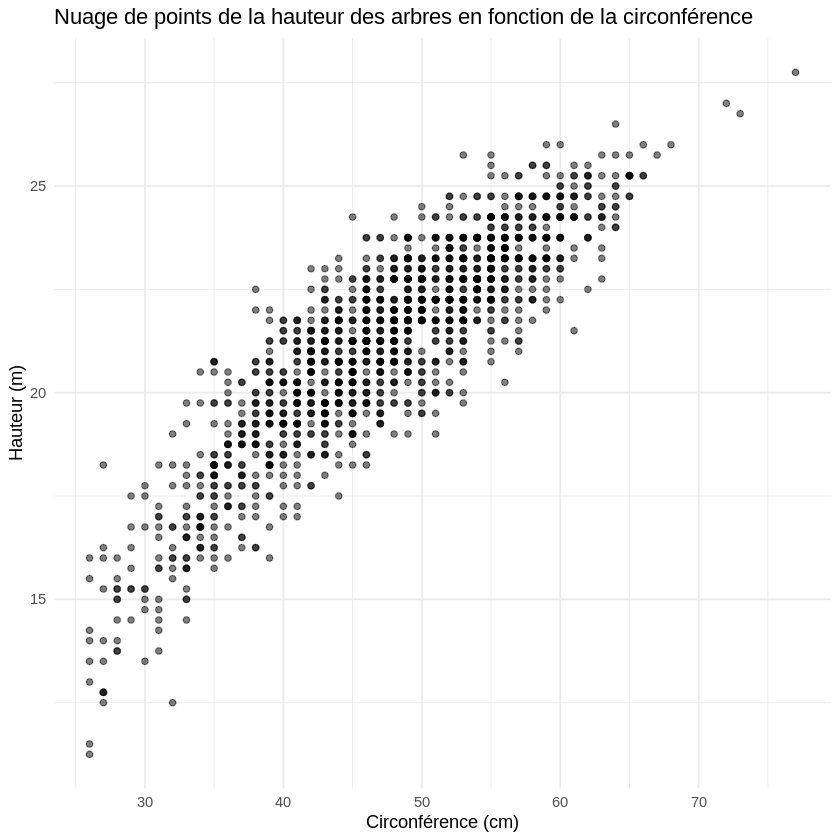

In [5]:
ggplot(data, aes(x=Circumference, y=Height)) +
  geom_point(alpha=0.5) +
  ggtitle("Nuage de points de la hauteur des arbres en fonction de la circonférence") +
  xlab("Circonférence (cm)") +
  ylab("Hauteur (m)") +
  theme_minimal()

# COMMENTAIRE

On remarque que les points semblent s’aligner le long d’une droite. Ce qui nous informe sur le fait qu’il est coherent de faire une regression lineaire sur ce jeu de donnees.

2°)

In [6]:
model <- lm(Height ~ Circumference, data=data)

In [7]:
summary(model)


Call:
lm(formula = Height ~ Circumference, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7659 -0.7802  0.0557  0.8271  3.6913 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.037476   0.179802   50.26   <2e-16 ***
Circumference 0.257138   0.003738   68.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.199 on 1427 degrees of freedom
Multiple R-squared:  0.7683,	Adjusted R-squared:  0.7682 
F-statistic:  4732 on 1 and 1427 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


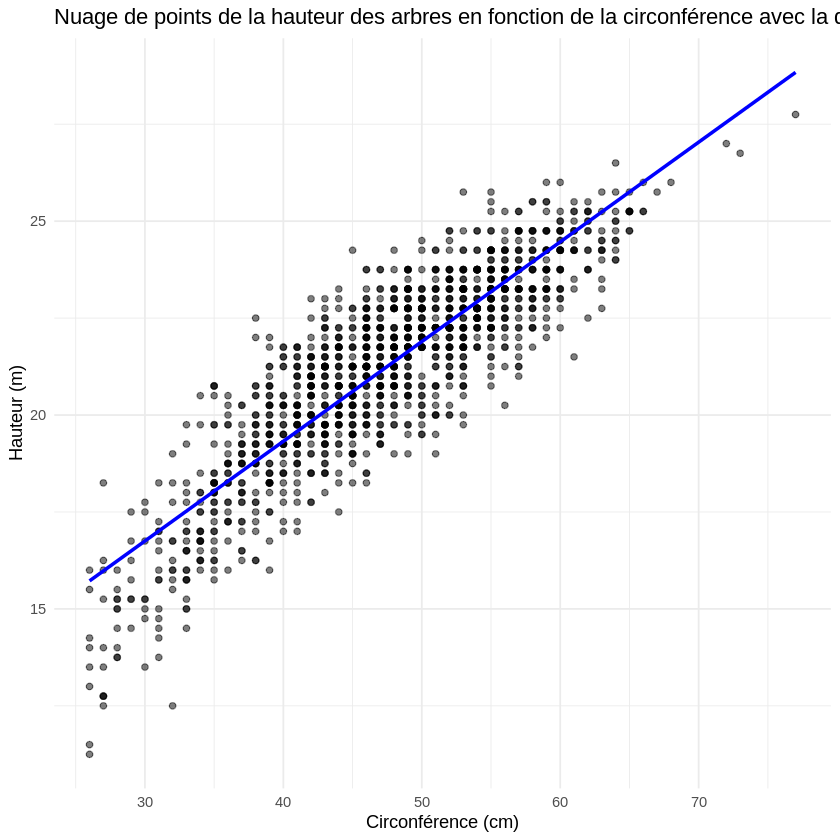

In [8]:
ggplot(data, aes(x=Circumference, y=Height)) +
  geom_point(alpha=0.5) +
  geom_smooth(method="lm", se=FALSE, color="blue") +
  ggtitle("Nuage de points de la hauteur des arbres en fonction de la circonférence avec la droite de régression") +
  xlab("Circonférence (cm)") +
  ylab("Hauteur (m)") +
  theme_minimal()

### Explication des résultats
On remarque que la droite tracee suit l’allure du nuage de points. On peut alors en determiner l’equation grace au summary.
On a alors comme equation de droite de regression :
yi = 9.0374757 + 0.2571379*xi
On remarque que ces derniers sont positifs, on peut alors penser que l’´evolution entre les deux variables est liee selon une augmentation.


3°)

In [9]:
summary_model <- summary(model)

In [10]:
print(summary_model)


Call:
lm(formula = Height ~ Circumference, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7659 -0.7802  0.0557  0.8271  3.6913 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.037476   0.179802   50.26   <2e-16 ***
Circumference 0.257138   0.003738   68.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.199 on 1427 degrees of freedom
Multiple R-squared:  0.7683,	Adjusted R-squared:  0.7682 
F-statistic:  4732 on 1 and 1427 DF,  p-value: < 2.2e-16



In [11]:
r_squared <- summary_model$r.squared
cat("Le pourcentage de variabilité expliquée par le modèle est :", r_squared * 100, "%\n")

Le pourcentage de variabilité expliquée par le modèle est : 76.83202 %


Le pourcentage de variabilite expliquee par le modele correspond au R² donne dans la regression lineaire.
Plus il est proche de 1, plus on a un modele qui explique toute la variabilite de la variable d´ependante.  Dans ce cas, on a un modele qui est plutot bien adapte aux donnees

4°)


In [12]:
new_data <- data.frame(Circumference = 30)
predicted_height <- predict(model, newdata = new_data)

cat("La hauteur prévue par le modèle pour un arbre de circonférence 30 cm est :", predicted_height, "m\n")

La hauteur prévue par le modèle pour un arbre de circonférence 30 cm est : 16.75161 m


En se basant sur les donnees sur lesquelles on a fait notre regression, on peut predire qu’un arbre de circonference 30 cm, aura une hauteur de 16.75 m

5°)

On cherche alors a verifier si la hauteur augmente avec la circonference. On peut calculer le coefficient de correlation entre les deux variables :

In [13]:
coefficients <- summary_model$coefficients
cat("Coefficients:\n")
print(coefficients)

Coefficients:
               Estimate  Std. Error  t value      Pr(>|t|)
(Intercept)   9.0374757 0.179801585 50.26360 4.594514e-318
Circumference 0.2571379 0.003737894 68.79218  0.000000e+00


On remarque que la correlation entre les deux variable est tres forte . Cela indique qu’il y a bien un lien important entre la hauteur et la circonference.
De plus, si l’on revient a l’equation de regrssion, on avait des coefficients de regressions β1 et β0 strictement positif.
On a alors une augmentation de la hauteur lorsque la circonference augmente

6°)

In [16]:
data$predicted <- predict(model)
data$residuals <- residuals(model)

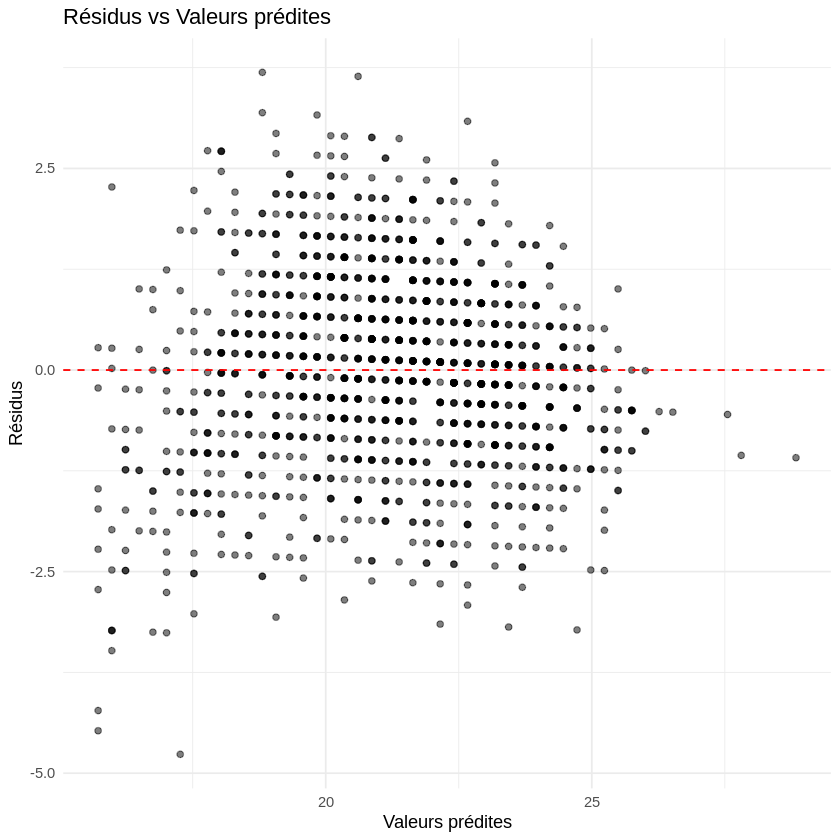

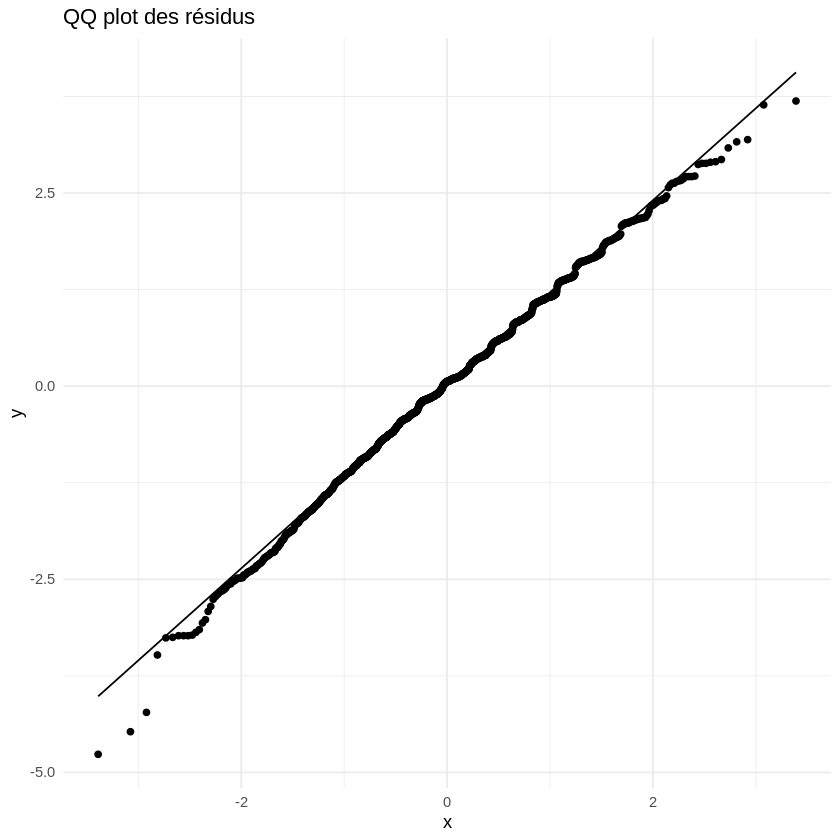

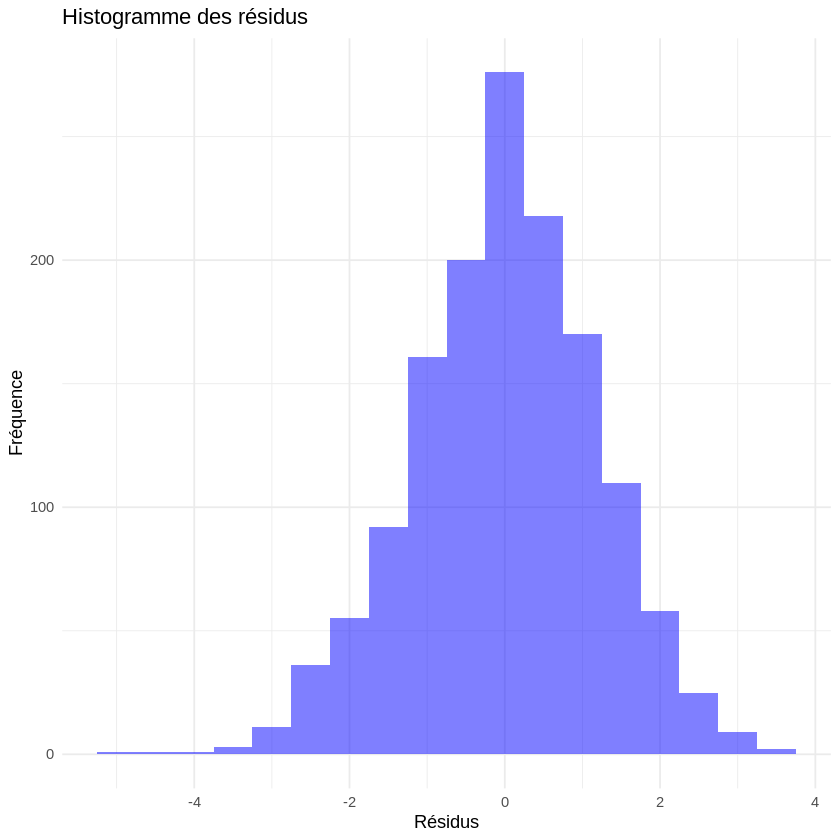

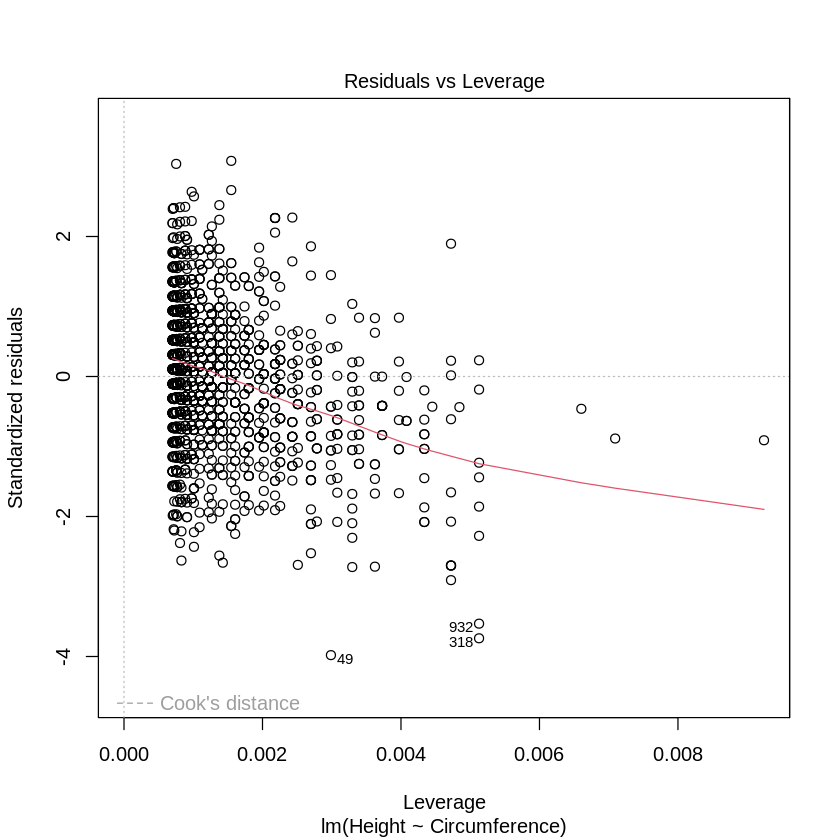

In [18]:
ggplot(data, aes(x=predicted, y=residuals)) +
  geom_point(alpha=0.5) +
  geom_hline(yintercept=0, linetype="dashed", color="red") +
  ggtitle("Résidus vs Valeurs prédites") +
  xlab("Valeurs prédites") +
  ylab("Résidus") +
  theme_minimal()
ggplot(data, aes(sample=residuals)) +
  stat_qq() +
  stat_qq_line() +
  ggtitle("QQ plot des résidus") +
  theme_minimal()
ggplot(data, aes(x=residuals)) +
  geom_histogram(binwidth=0.5, fill="blue", alpha=0.5) +
  ggtitle("Histogramme des résidus") +
  xlab("Résidus") +
  ylab("Fréquence") +
  theme_minimal()
plot(model, which=5)

On remarque que les residus sont repartis de facon aleatoire autour du 0. Ils n’ont pas d’allure particuliere et sont tous compris entre −4 et 4. Alors le modele est valide.

On peut egalement verifier que les residus suivent une loi Normale centree reduite. Pour cela, on fait apparaitre l’histogramme des residus :

On remarque que l’histogramme suit bien la forme de la representation d’une loi normale centree reduite.
On peut donc en conclure que notre modele est valide.
On cherche alors a determiner s’il y a des points aberrants. Pour cela, on travaille toujours sur les residus mais cette fois ci standardises. Ces derniers sont divses par l’ecart-type estime, ils permettent donc de comparer
les donnees sans unite particuliere. En privilegiant les residus standardises, on peut rendre compte d’a quel point les points different de la norme.
On se fixe un seuil de 3, et on ne selectionne les points dit aberrants.

Les points en rouge sur le graphe sont les points consideres comme aberrants. Ils s’elevent au nombre de 5 sur 1429 observations ce qui est tres peu. Ainsi, on peut dire que le mod`ele est bien valide.


## EXERCICE 2

1°) 

In [19]:
data <- read.table("http://math.univ-lyon1.fr/~honore/colinearite.txt", header=TRUE)

In [20]:
data$X4 <- data$X1 + data$X2

In [21]:
model <- lm(Y ~ X1 + X2 + X4, data=data)

In [22]:
summary(model)


Call:
lm(formula = Y ~ X1 + X2 + X4, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66647 -0.58415  0.08836  0.36022  1.53476 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.11624    0.12154   0.956    0.345    
X1           3.97416    0.09888  40.192   <2e-16 ***
X2           3.88806    0.10915  35.621   <2e-16 ***
X4                NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7649 on 37 degrees of freedom
Multiple R-squared:  0.9879,	Adjusted R-squared:  0.9873 
F-statistic:  1513 on 2 and 37 DF,  p-value: < 2.2e-16


2°)

In [23]:
# Régression de Y sur X1, X2 et X3
model <- lm(Y ~ X1 + X2 + X3, data=data)

In [24]:
# Affichage des résultats
summary(model)


Call:
lm(formula = Y ~ X1 + X2 + X3, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.58062 -0.58749  0.04207  0.38831  1.51115 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.01755    0.20478   0.086    0.932
X1           0.52890    5.72675   0.092    0.927
X2           0.44433    5.72439   0.078    0.939
X3           1.72684    2.86994   0.602    0.551

Residual standard error: 0.7716 on 36 degrees of freedom
Multiple R-squared:  0.988,	Adjusted R-squared:  0.987 
F-statistic: 991.4 on 3 and 36 DF,  p-value: < 2.2e-16


On remarque alors que l’on a une equation de regression de la forme 
yi = β+β1x1+β2x2+β4x4, cependant, le coefficient β4 = NA. Cela signifie que la variable X4 n’est pas prise en compte dans la regression. Cela est du au fait qu’il y a une colinearite entre les variables explicatives. Alors, on peut afficher les nuages de points, on a le resultat suivant :


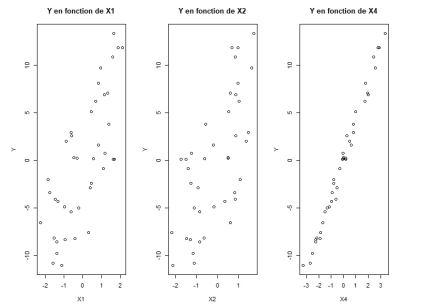

On peut alors remarquer que le nuage de point de Y en fonction de X4 est tres lineaire alors que ceux en fonction de X1 et X2 ne le sont pas.

2.3°)

In [ ]:
reg2 <- lm ( Y ~ X1 + X2 + X3 , data = data )
reg2

Analysons les nuages de points

In [ ]:
par ( mfrow = c (1 ,3))
plot ( data $X1 , data $Y , xlab = " X1 " , ylab = " Y " , main = " Y ␣ en ␣ fonction ␣ de ␣ X1 " )
plot ( data $X2 , data $Y , xlab = " X2 " , ylab = " Y " , main = " Y ␣ en ␣ fonction ␣ de ␣ X2 " )
plot ( data $X3 , data $Y , xlab = " X4 " , ylab = " Y " , main = " Y ␣ en ␣ fonction ␣ de ␣ X3 " )

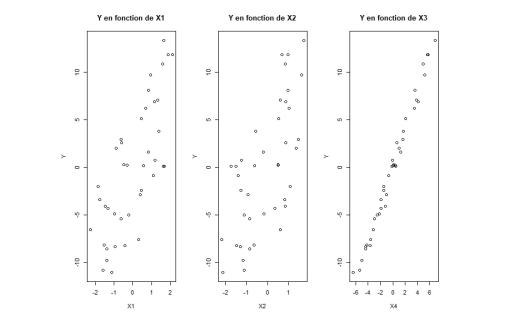

On peut remarquer que comme precedemment avec X4, les points de Y en fonction de X3 sont places selon un axe lineaire. On peut alors penser qu’il y a egalement une colinearite importante.


In [ ]:
summary ( reg2 )

In [ ]:
Call :
lm ( formula = Y ~ X1 + X2 + X3 , data = data )
Residuals :
    Min 1 Q Median 3 Q Max
-1.58062 -0.58749 0.04207 0.38831 1.51115
Coefficients :
        Estimate Std . Error t value Pr ( >| t |)
( Intercept ) 0.01755 0.20478 0.086 0.932
X1 0.52890 5.72675 0.092 0.927
X2 0.44433 5.72439 0.078 0.939
X3 1.72684 2.86994 0.602 0.551
Residual standard error : 0.7716 on 36 degrees of freedom
Multiple R - squared : 0.988 , Adjusted R - squared : 0.987
F - statistic : 991.4 on 3 and 36 DF , p - value : < 2.2 e -16

> reg2$coefficients
( Intercept )    X1     X2      X3
0.0175457    0.5289038  0.4443297    1.7268385

Cette fois ci, on peut remarquer que le coefficient associe a la variable X3 est plus de 3 fois plus ´elev´e que les
autres. La regression depend alors essentiellement de cette variable.


D’autre part, on peut calculer la correlation entre X3 et Y 

In [ ]:
> cor ( data $Y , data $X3 )
[1] 0.9939495
> cor ( data $X3 , data $X4 )
[1] 0.9999205

Cette fois ci egalement, la correlation entre les variables Y et X3 est tres elevee.
De, plus, on peut remarquer egalement que la correlation entre X3 et X4 est tres elevee, donc X3 est tres
liee a X1 +X2.
On a donc de nouveau un cas de colinearite, mais cette fois ci pas parfaite.
Alors, on peut dire que la corr´elation est approch´ee.
Les consequences en sont assez similaire, l’estimation des coefficients n’etant pas assez pr´ecise et l’interpr´etation des effets de chaque variable difficile a percevoire